# Project Goals

* Load social security data about baby names
* Analyze name popularity across years
* Compute 10 most popular names for a year
* Identify name fads
* Challenge: Identify most-used unisex names

# Loading Dataset

* Uncompressing a zip archive
* Listing the contents of a directory
* Loading a CSV dataset into Pandas
* Concatenating DataFrames

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

In [3]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

KeyboardInterrupt: 

In [4]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [5]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [7]:
names2011 = pd.read_csv('names/yob2011.txt')

In [8]:
names2011

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236
5,Abigail,F,13229
6,Madison,F,12360
7,Mia,F,11512
8,Chloe,F,10970
9,Elizabeth,F,10062


In [9]:
names2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'])

In [11]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [141]:
names_all = []

for year in range(1880, 2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year), names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year 
    
all_years = pd.concat(names_all)
all_years   

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [20]:
names_all[-1]

,name,sex,number,year
0,Emma,F,20799,2014
1,Olivia,F,19674,2014
2,Sophia,F,18490,2014
3,Isabella,F,16950,2014
4,Ava,F,15586,2014
5,Mia,F,13442,2014
6,Emily,F,12562,2014
7,Abigail,F,11985,2014
8,Madison,F,10247,2014
9,Charlotte,F,10048,2014


# Name Popularity

* Setting and sorting indexes
* Selecting rows by index value
* Making a stacked line plot in matplotlib

In [40]:
all_years_indexed = all_years.set_index(['sex','name','year']).sort_index()

In [45]:
all_years_indexed.head()

number
sex name      year       
F   Aabha     2011      7
              2012      5
              2014      9
    Aabriella 2008      5
              2014      5

In [46]:
all_years_indexed.loc['F','Mary'].head()

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217


In [28]:
def plotname(sex, name):
    data = all_years_indexed.loc[sex,name]
    
    plt.plot(data.index, data.values)

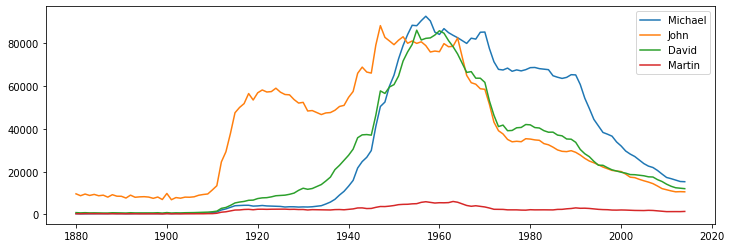

In [30]:
plt.figure(figsize=(12,4))

names = ['Michael', 'John', 'David', 'Martin']

for name in names:
    plotname('M', name)
    
plt.legend(names)

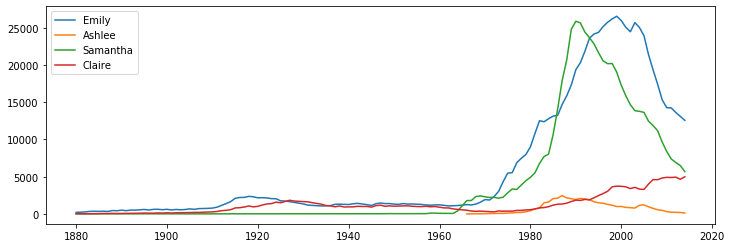

In [32]:
plt.figure(figsize=(12,4))

names = ['Emily','Ashlee','Samantha','Claire']

for name in names:
    plotname('F', name)
    
plt.legend(names)

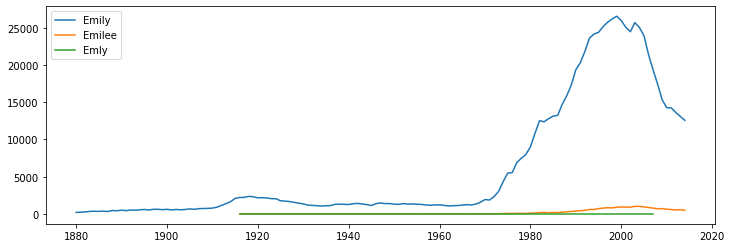

In [53]:
plt.figure(figsize=(12,4))

names = ['Emily','Emilee','Emly']

for name in names:
    plotname('F', name)
    
plt.legend(names)

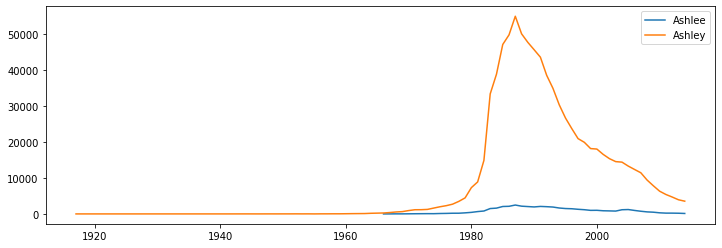

In [34]:
plt.figure(figsize=(12,4))

names = ['Ashlee','Ashley']

for name in names:
    plotname('F', name)
    
plt.legend(names)

In [64]:
names = ['Chiara','Claire','Clare','Clara','Ciara']

In [65]:
all_years_indexed.loc['F'].loc[names].head()

number
name   year       
Chiara 1959      9
       1960      5
       1962      8
       1963      8
       1964     12

In [66]:
all_years_indexed.loc['F'].loc[names].unstack(level=0)

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880    NaN   NaN     21  1226    15
1881    NaN   NaN     23  1242    20
1882    NaN   NaN     30  1490    21
1883    NaN   NaN     38  1548    22
1884    NaN   NaN     33  1852    38

In [74]:
variants = all_years_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

In [78]:
variants

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880      0     0     21  1226    15
1881      0     0     23  1242    20
1882      0     0     30  1490    21
1883      0     0     38  1548    22
1884      0     0     33  1852    38
1885      0     0     49  1910    27
1886      0     0     61  1916    26
1887      0     0     58  1984    31
1888      0     0     73  2230    43
1889      0     0     62  2319    34
1890      0     0     72  2496    35
1891      0     0     84  2360    34
1892      0     0     86  2661    56
1893      0     0     92  2532    30
1894      0     0     96  2603    56
1895      0     0    118  2613    47
1896      0     0    106  2582    53
1897      0     0    105  2454    48
1898      0     0    133  2731    59
1899      0     0    121  2441    37
1900      0     0    156  2826    63
1901      0     0    122  2319    47
1902      0     0    156  2432    57
1903      0     0    164  2342    57
1904      0     0    163  2281    59
1905      0     0    184  2397    67
1906      0     0    213  2228    59
1907      0     0    206  2319    55
1908      0     0    235  2352    70
1909      0     0    259  2403    73
...     ...   ...    ...   ...   ...
1985     42   549   1185   357   208
1986     46   733   1304   387   211
1987     48   770   1332   402   248
1988     54   703   1446   418   252
1989     49   883   1670   424   280
1990     62   944   1851   466   338
1991     53  1050   1818   524   323
1992     71  1369   1948   536   323
1993     59  1436   1894   592   328
1994     74  1401   2172   585   355
1995    104  1585   2473   656   387
1996     98  1430   2737   661   450
1997    100  1401   3039   643   446
1998     93  1230   3641   759   510
1999    121  1218   3732   782   507
2000    120  1139   3710   868   484
2001    139  1005   3641   951   461
2002    203   904   3404  1022   433
2003    186   791   3570  1049   417
2004    201   977   3333  1162   419
2005    183  2320   3291  1322   411
2006    172  1605   4012  1493   438
2007    176  1361   4611  1545   473
2008    155  1038   4598  1646   452
2009    183   888   4824  1644   404
2010    145   698   4914  1836   420
2011    133   550   4893  2072   414
2012    111   471   4941  2331   379
2013    141   435   4651  2499   376
2014    131   418   4991  2833   383

[133 rows x 5 columns]

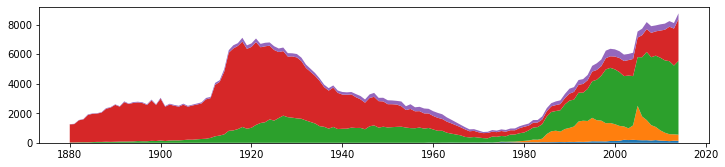

In [87]:
plt.figure(figsize=(12,2.5))

plt.stackplot(variants.index, variants.values.T)

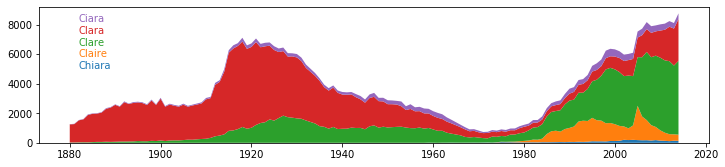

In [92]:
plt.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
plt.stackplot(variants.index, variants.values.T,colors=palette)

for i,name in enumerate(names):
    plt.text(1882,5000+800*i,name,color=palette[i])

# A yearly top ten

* Sorting a DataFrame by a column
* Dropping columns from a DataFrame
* Joining frames based on index
* Counting values in a Series

In [99]:
all_years_indexed.loc['M',:,2008].sort_values('number', ascending=False).head()

number
sex name    year       
M   Jacob   2008  22568
    Michael 2008  20590
    Ethan   2008  20196
    Joshua  2008  19186
    Daniel  2008  18985

In [100]:
pop2018 = all_years_indexed.loc['M',:,2008].sort_values('number', ascending=False).head()

In [102]:
pop2018.reset_index().drop(['sex','number','year'], axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [109]:
def topten(sex,year):
    simple = all_years_indexed.loc[sex,:,year].sort_values('number', ascending=False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [110]:
topten('M', 2009)

,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [111]:
def toptens(sex,startyear,endyear):
    years = [topten(sex,year) for year in range(startyear, endyear+1)]
    
    return years[0].join(years[1:])

In [114]:
toptens('M', 1990, 2014)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Jacob,...,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Noah,Noah
2,Christopher,Christopher,Christopher,Christopher,Christopher,Matthew,Matthew,Jacob,Jacob,Michael,...,Michael,Michael,Michael,Michael,Ethan,Ethan,Mason,Mason,Liam,Liam
3,Matthew,Matthew,Matthew,Matthew,Matthew,Christopher,Jacob,Matthew,Matthew,Matthew,...,Joshua,Joshua,Ethan,Ethan,Michael,Michael,William,Ethan,Jacob,Mason
4,Joshua,Joshua,Joshua,Joshua,Joshua,Jacob,Christopher,Christopher,Joshua,Joshua,...,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden,Jayden,Noah,Mason,Jacob
5,Daniel,Andrew,Andrew,Tyler,Tyler,Joshua,Joshua,Joshua,Christopher,Nicholas,...,Ethan,Matthew,Daniel,Daniel,William,William,Noah,William,William,William
6,David,Daniel,Brandon,Brandon,Brandon,Nicholas,Nicholas,Nicholas,Nicholas,Christopher,...,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander,Michael,Liam,Ethan,Ethan
7,Andrew,James,Daniel,Daniel,Jacob,Tyler,Tyler,Brandon,Brandon,Andrew,...,Daniel,Andrew,Anthony,William,Daniel,Noah,Ethan,Michael,Michael,Michael
8,James,David,Tyler,Nicholas,Daniel,Brandon,Brandon,Andrew,Tyler,Joseph,...,Anthony,Christopher,William,Anthony,Jayden,Daniel,Alexander,Jayden,Alexander,Alexander
9,Justin,Joseph,James,Jacob,Nicholas,Daniel,Austin,Austin,Andrew,Daniel,...,Joseph,Anthony,Matthew,Christopher,Noah,Aiden,Aiden,Alexander,Jayden,James
10,Joseph,John,David,Andrew,Andrew,Austin,Andrew,Tyler,Austin,Tyler,...,Christopher,William,Andrew,Matthew,Christopher,Anthony,Daniel,Aiden,Daniel,Daniel


In [113]:
toptens('F', 1985, 1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [115]:
toptens('F', 1985, 1995).stack().head()

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [116]:
toptens('F', 1985, 1995).stack().value_counts()

Sarah        11
Elizabeth    11
Amanda       11
Jessica      11
Ashley       11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Taylor        3
Megan         3
Heather       3
Lauren        2
Hannah        1
dtype: int64

In [117]:
popular = toptens('F', 1985, 1995).stack().value_counts().index[:6]
popular

Index(['Sarah', 'Elizabeth', 'Amanda', 'Jessica', 'Ashley', 'Brittany'], dtype='object')

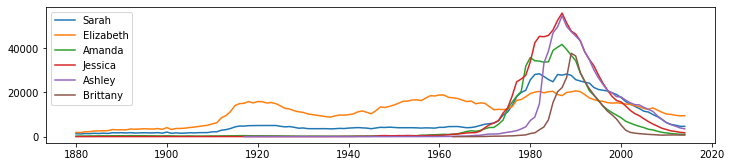

In [120]:
plt.figure(figsize=(12,2.5))

for name in popular:
    plotname('F', name)
    
plt.legend(popular)

# Name fads

* Grouping data with groupby
* Computing aggregations
* Combining Boolean masks

In [147]:
all_years.groupby(['sex','name']).sum().head()

year
sex name            
F   Aabha       6037
    Aabriella   4022
    Aaden       2009
    Aadhira     6039
    Aadhya     16084

In [148]:
all_years.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [140]:
all_years.groupby(['sex','name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [123]:
totals = all_years.groupby(['sex','name'])['number'].sum()

In [159]:
totals.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [156]:
def sumsq(x):
    return sum(x**2)

In [157]:
result = all_years.groupby(['sex','name'])['number'].agg(sumsq)
print(result.head())

sex  name     
F    Aabha           155
     Aabriella        50
     Aaden            25
     Aadhira         305
     Aadhya       107255
Name: number, dtype: int64


In [161]:
spikyness = all_years.groupby(['sex','name'])['number'].agg(sumsq) / totals**2
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [180]:
spikyness[totals > 5000].loc['M','Iker']

0.19936813237275397

In [219]:
spiky_common = spikyness[totals > 5000].copy()
spiky_common = spiky_common.sort_values(ascending=False)
spiky_common.head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.161368
     Bentley      0.159736
F    Arya         0.159564
     Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [207]:
spiky_common.head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.161368
     Bentley      0.159736
F    Arya         0.159564
     Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [208]:
spiky_common.tail(10)

sex  name   
F    Minerva    0.009010
     Nina       0.008907
     Celia      0.008787
M    Hiram      0.008768
     Will       0.008756
F    Rosa       0.008659
     Mollie     0.008547
M    Ike        0.008445
F    Delia      0.008397
     Louisa     0.008058
Name: number, dtype: float64

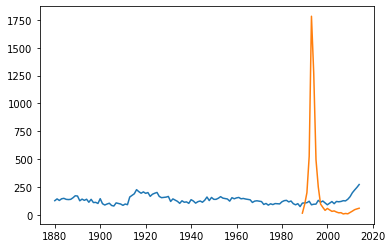

In [209]:
plotname('F', 'Louisa')
plotname('M', 'Shaquille')

In [210]:
fads = spiky_common.head(10).index.values
fads

array([('M', 'Iker'), ('M', 'Shaquille'), ('M', 'Jase'), ('F', 'Adalynn'),
       ('F', 'Harper'), ('M', 'Brantley'), ('M', 'Bentley'),
       ('F', 'Arya'), ('F', 'Miley'), ('F', 'Paisley')], dtype=object)

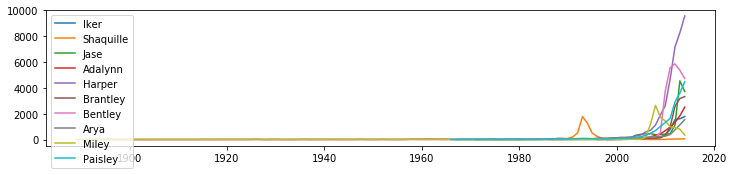

In [211]:
plt.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)
    
plt.legend([name for sex,name in fads],loc='upper left')

In [227]:
total_recent = all_years[all_years['year'] > 2005].groupby(['sex','name'])['number'].sum()
total_recent.sort_values(ascending=False).head()

sex  name    
M    Jacob       189021
F    Isabella    174556
     Emma        172824
     Sophia      167839
M    Ethan       165647
Name: number, dtype: int64

In [228]:
spiky_common = spikyness[(totals > 5000) & (total_recent < 1000)].copy()
spiky_common = spiky_common.sort_values(ascending=False)
spiky_common.head(10)

sex  name     
M    Shaquille    0.195689
F    Katina       0.121684
     Krystle      0.100106
M    Devante      0.099617
F    Khadijah     0.091650
     Shanice      0.089675
     Iesha        0.088810
     Shaniqua     0.087601
     Marquita     0.081622
     Sheena       0.081302
Name: number, dtype: float64

In [215]:
fads = spiky_common.head(10).index.values
fads

array([('M', 'Shaquille'), ('F', 'Katina'), ('F', 'Krystle'),
       ('M', 'Devante'), ('F', 'Khadijah'), ('F', 'Shanice'),
       ('F', 'Iesha'), ('F', 'Shaniqua'), ('F', 'Marquita'),
       ('F', 'Sheena')], dtype=object)

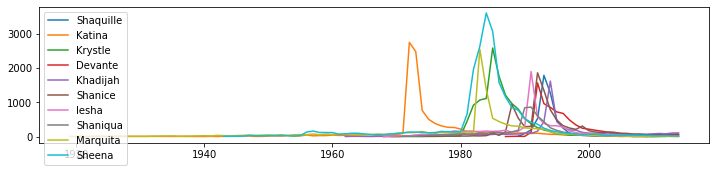

In [216]:
plt.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)
    
plt.legend([name for sex,name in fads],loc='upper left')

# Challenge Objectives

* Compute the number of times that each name was used, separately for boys and girls
* Identify the unisex names where the ratio between the boys and girls totals is between 1-to-4 and 4-to-1
* Plot popularity vs. year for the top 10 unisex names

In [229]:
totals = all_years.groupby(['sex','name'])['number'].sum()

In [230]:
totals.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [232]:
totals_bysex = totals.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [233]:
totals_both = totals_bysex.sum(axis=1)

In [235]:
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [236]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [240]:
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [238]:
unisex = (ratio > 0.25) & (ratio < 4)

In [243]:
totals_both = totals_both[unisex]
totals_both = totals_both.sort_values(ascending=False)
totals_both.head(10)

name
Willie    581317.0
Jordan    479170.0
Taylor    415940.0
Leslie    369005.0
Jamie     346478.0
Angel     300188.0
Lee       284912.0
Jessie    270697.0
Marion    254155.0
Dana      237331.0
dtype: float64

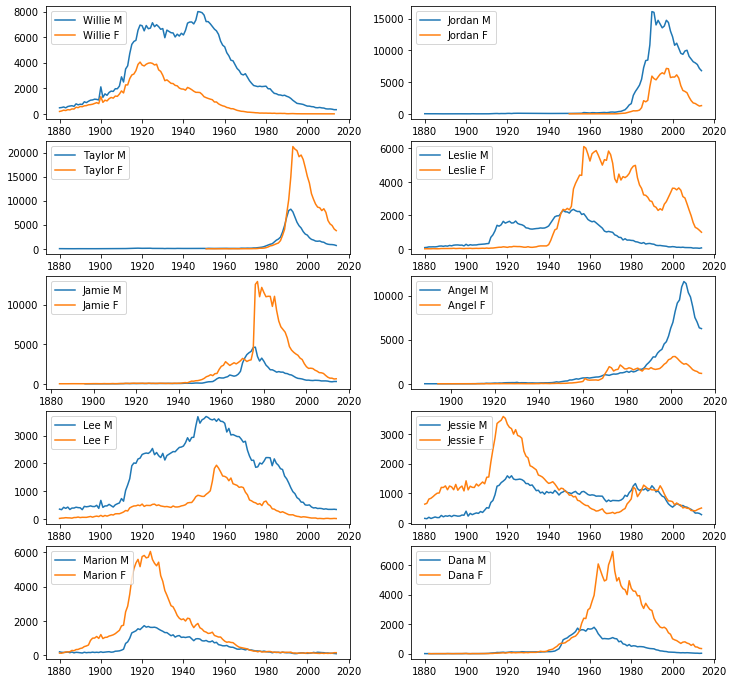

In [247]:
names = totals_both.head(10).index.values

plt.figure(figsize=(12,12))

for i,name in enumerate(names):
    plt.subplot(5,2,i+1)
    plotname('M', name)
    plotname('F', name)
    
    plt.legend([name + ' M', name + ' F'], loc='upper left')